In [1]:
import sys
sys.path.append("../LearningModel/")
sys.path.append("../pre-processing/")
from prepare_data import prepare_data
from utils import precision_recall_f1
import numpy as np
import pickle
import matplotlib.pyplot as plt
import LogisticRegression as LR

In [2]:
#validation on a completely different data set
train_data = pickle.load(open("/Users/williamlevine/Downloads/6-seconds-trial-1.MultFeat"))
train_labels = train_data[1]
train_x = np.array(train_data[0])

In [3]:
lr = LR.generateLR(train_x, train_labels)

In [4]:
#validation on a completely different data set
test_data = pickle.load(open("/Users/williamlevine/Downloads/mixture-trial-4.MultFeat"))
test_labels = test_data[1]
test_x = np.array(test_data[0])

In [5]:
predictions = LR.getPredictions(test_x, lr)

In [24]:
precision_recall_f1(np.abs(predictions), np.abs(test_labels), 50, 1)

Precision: 0.862145636465
Recall: 0.952215287015
F1: 0.904944814509


(0.8621456364647027, 0.952215287015246, 0.904944814508679)

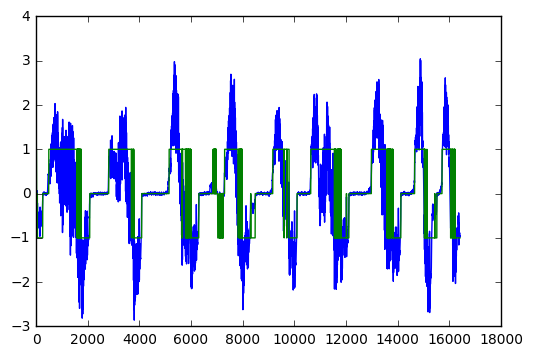

In [25]:
plt.plot(test_x[:, 1])
plt.plot(predictions )
plt.show()